# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q3.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle
from time import time

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1
X2=D.X2
y1=D.y1
y2=D.y2

In [2]:
print('X1:',X1.shape,X1.dtype)
print('y1:',y1.shape)
print('X2:',X2.shape)
print('y2:',y2.shape)


X1: (10000, 28, 28) uint8
y1: (10000,)
X2: (5000, 28, 28)
y2: (5000,)


In [9]:
pickle.dump(D,open('kMNISTsmall.p','wb'))

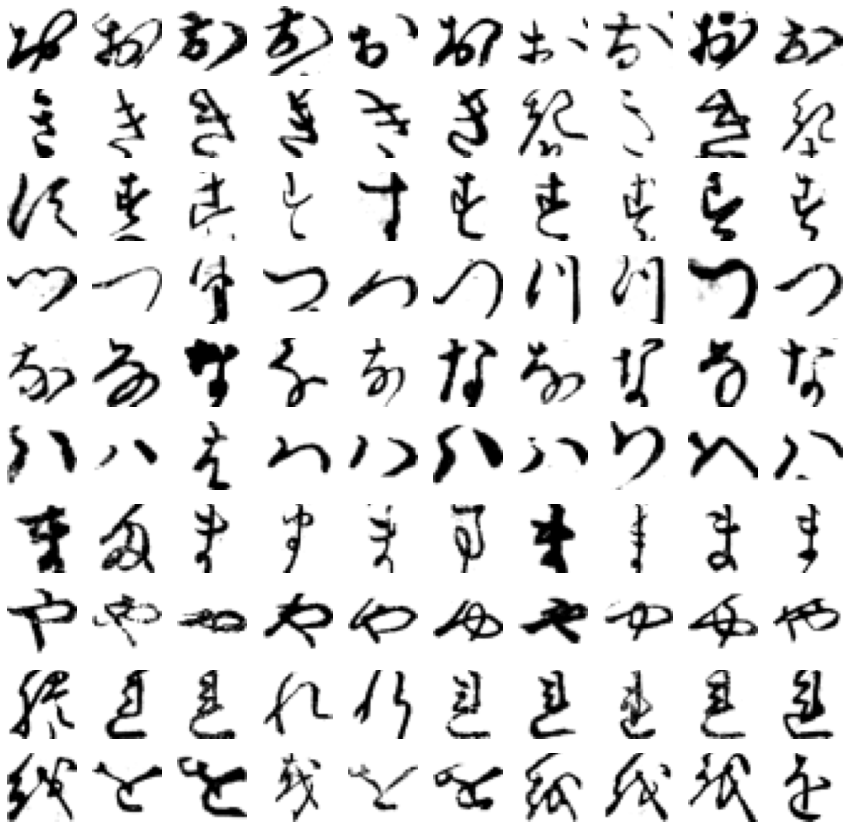

In [25]:
plt.figure(figsize=(15,15))
c=1
for i in range(10):
    for j in range(10):
        plt.subplot(10,10,c)
        c+=1
        plt.imshow(A[i*10+j,:],cmap='binary')
        plt.axis('off')


# Question 1: 
##  Consider an MLP network with the following architecture: 
##  - an input layer able to deal with the kMNIST images.
##  - 3 hidden layers with 50 units each and with $\texttt{ReLu}$ activations.
##  - an output layer with 10 units and a softmax activation function
### a) Build this network, and compile it with the loss and the optimizer of your choice. Make sure not to include any extra layers (e.g. Dropout). Print the total number of parameters of the MLP.
### b) Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set. For this purpose use the raw data (make sure not to perform any scaling or transformation of the  data). Also include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results.
### d) Print the total number of errors and the confusion matrix for the test dataset.

## 1.a)

In [38]:
#build the MLP
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(50,activation='relu',input_shape=(784,)))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))
print(mlp.summary())

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________
None


## 1.b)

In [39]:
#prepare data + labels
X1=X1.reshape((10000,784))*1.#/255.
X2=X2.reshape((5000,784))*1.#/255.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

train=mlp.fit(X1,Y1,epochs=100,batch_size=5000,validation_data=(X2,Y2))


(10000, 784) (5000, 784) (10000, 10) (5000, 10)
Epoch 1/100
2/2 [==============================] - 1s 192ms/step - loss: 92.9722 - accuracy: 0.0954 - val_loss: 53.5968 - val_accuracy: 0.1208
Epoch 2/100
2/2 [==============================] - 0s 67ms/step - loss: 49.9684 - accuracy: 0.1240 - val_loss: 37.8700 - val_accuracy: 0.1392
Epoch 3/100
2/2 [==============================] - 0s 71ms/step - loss: 34.3361 - accuracy: 0.1629 - val_loss: 28.6698 - val_accuracy: 0.1656
Epoch 4/100
2/2 [==============================] - 0s 112ms/step - loss: 25.0647 - accuracy: 0.2091 - val_loss: 22.7799 - val_accuracy: 0.1872
Epoch 5/100
2/2 [==============================] - 0s 80ms/step - loss: 19.1432 - accuracy: 0.2357 - val_loss: 18.5235 - val_accuracy: 0.2020
Epoch 6/100
2/2 [==============================] - 0s 75ms/step - loss: 15.1181 - accuracy: 0.2642 - val_loss: 15.6204 - val_accuracy: 0.2188
Epoch 7/100
2/2 [==============================] - 0s 68ms/step - loss: 12.3297 - accuracy: 0.2946

Epoch 59/100
2/2 [==============================] - 0s 64ms/step - loss: 1.1188 - accuracy: 0.7092 - val_loss: 2.9139 - val_accuracy: 0.4614
Epoch 60/100
2/2 [==============================] - 0s 66ms/step - loss: 1.0960 - accuracy: 0.7111 - val_loss: 2.8924 - val_accuracy: 0.4644
Epoch 61/100
2/2 [==============================] - 0s 64ms/step - loss: 1.0830 - accuracy: 0.7157 - val_loss: 2.8988 - val_accuracy: 0.4640
Epoch 62/100
2/2 [==============================] - 0s 68ms/step - loss: 1.0709 - accuracy: 0.7172 - val_loss: 2.8987 - val_accuracy: 0.4646
Epoch 63/100
2/2 [==============================] - 0s 67ms/step - loss: 1.0711 - accuracy: 0.7187 - val_loss: 2.9027 - val_accuracy: 0.4686
Epoch 64/100
2/2 [==============================] - 0s 66ms/step - loss: 1.0637 - accuracy: 0.7171 - val_loss: 2.8477 - val_accuracy: 0.4680
Epoch 65/100
2/2 [==============================] - 0s 72ms/step - loss: 1.0321 - accuracy: 0.7249 - val_loss: 2.8520 - val_accuracy: 0.4692
Epoch 66/100


## 1.c)

(0.0, 100.0, 0.0, 5.25)

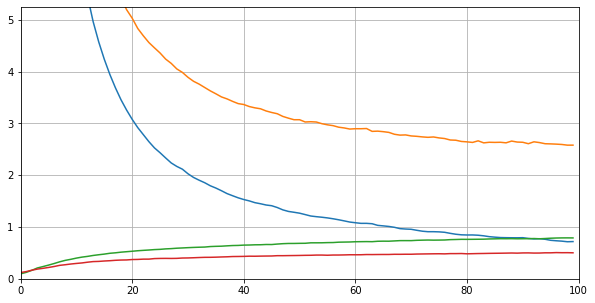

In [42]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,100,0,5.25])

## 1.d)

In [43]:
Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

[[299  23   3  11  39  31   4  20  33  37]
 [  7 249  39   9  47  15  46   5  50  33]
 [ 10  58 199  20  34  30  39  30  31  49]
 [  9  26  20 285  16  29  32  21  42  20]
 [ 44  43  35  10 254  16  35  19  11  33]
 [  3  42  72  12  20 261  41   6  21  22]
 [ 12  38  51  15  41  13 268  20  30  12]
 [ 26  29  42  22  63  15  28 193  38  44]
 [ 12  30  29  28  19  24  47  15 256  40]
 [ 15  44  53  10  52  11  18  24  26 247]]
Score: 50.22
Number of erros: 2489


<hr style="border:2px solid black"> </hr>

# Question 2
## Consider a MLP network with the same architecture of the MLP from the previous question. The only difference being the input layer.
### a) Pre-process the data using the function  $\texttt{PCA(withen=True)}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 250 principal componentes of the data. Use the pre-processed data in the following items.
### b)  Build this network, and compile it with the loss and the optimizer used in the previous question.  Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set and include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results. Also print the total number of errors and the confusion matrix for the test dataset.

## 2.a)

In [83]:
from sklearn.decomposition import PCA

D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

X1=X1.reshape((10000,784))*1.
X2=X2.reshape((5000,784))*1.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

nCP=250
pca=PCA(n_components=nCP,whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)

print(X1p.shape)

(10000, 784) (5000, 784) (10000, 10) (5000, 10)
(10000, 250)


In [67]:
X2p.shape

(5000, 150)

## 2.b)

In [84]:
#build the MLP
mlp=keras.Sequential()
mlp.add(keras.layers.Flatten(input_shape=(nCP,)))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))
print(mlp.summary())

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])
train=mlp.fit(X1p,Y1,epochs=100,batch_size=5000,validation_data=(X2p,Y2))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 250)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 50)                12550     
_________________________________________________________________
dense_77 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_78 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_79 (Dense)             (None, 10)                510       
Total params: 18,160
Trainable params: 18,160
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
2/2 [==============================] - 1s 179ms/step - loss: 2.5168 - accuracy: 0.0875 - val_loss:

Epoch 52/100
2/2 [==============================] - 0s 58ms/step - loss: 0.4838 - accuracy: 0.8633 - val_loss: 1.4853 - val_accuracy: 0.5720
Epoch 53/100
2/2 [==============================] - 0s 38ms/step - loss: 0.4645 - accuracy: 0.8683 - val_loss: 1.4848 - val_accuracy: 0.5736
Epoch 54/100
2/2 [==============================] - 0s 58ms/step - loss: 0.4457 - accuracy: 0.8743 - val_loss: 1.4860 - val_accuracy: 0.5766
Epoch 55/100
2/2 [==============================] - 0s 54ms/step - loss: 0.4275 - accuracy: 0.8803 - val_loss: 1.4875 - val_accuracy: 0.5800
Epoch 56/100
2/2 [==============================] - 0s 46ms/step - loss: 0.4115 - accuracy: 0.8848 - val_loss: 1.4885 - val_accuracy: 0.5840
Epoch 57/100
2/2 [==============================] - 0s 58ms/step - loss: 0.3990 - accuracy: 0.8886 - val_loss: 1.4957 - val_accuracy: 0.5792
Epoch 58/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3832 - accuracy: 0.8933 - val_loss: 1.4990 - val_accuracy: 0.5838
Epoch 59/100


## 2.c)

[[319  10  15  13  42  28   2  21  32  18]
 [  7 324  27  17  32   5  36  12  26  14]
 [  5  23 275  26  36  10  37  25  34  29]
 [  6  18  27 354   8  17  15  13  32  10]
 [ 30  35  28  21 302   7  19  15  14  29]
 [ 10  22  57  19  10 310  30  10  27   5]
 [  6  29  41  13  18   4 343  17  21   8]
 [ 29  24   9  18  54   8  36 254  35  33]
 [ 11  25  46  27  12  15  22   7 323  12]
 [ 12  48  19  12  41   8  15  17  22 306]]
Score: 62.2
Number of erros: 1890


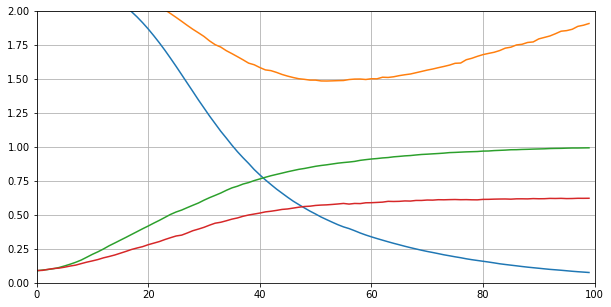

In [87]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,100,0,2])

Y2e=mlp.predict(X2p)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

<hr style="border:2px solid black"> </hr>

# Question 3
## Consider a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Train and test this new network. Make sure the test results are better than in the previous 2 questions.

In [50]:
#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

X1=X1.reshape((10000,784))/255.
X2=X2.reshape((5000,784))/255.
#take out some dims
#s=np.std(X1,axis=0)
#idx=s>.2
#X1=X1[:,idx]
#X2=X2[:,idx]
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)


mlp=keras.Sequential()
mlp.add(keras.layers.Dense(50,activation='relu',input_shape=(X1.shape[1],)))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))
#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])


In [51]:
train=mlp.fit(X1,Y1,epochs=200,batch_size=5000,validation_data=(X2,Y2))


Epoch 1/200
2/2 [==============================] - 1s 215ms/step - loss: 2.3451 - accuracy: 0.1003 - val_loss: 2.2862 - val_accuracy: 0.1244
Epoch 2/200
2/2 [==============================] - 0s 70ms/step - loss: 2.2784 - accuracy: 0.1286 - val_loss: 2.2506 - val_accuracy: 0.1706
Epoch 3/200
2/2 [==============================] - 0s 67ms/step - loss: 2.2279 - accuracy: 0.1693 - val_loss: 2.2057 - val_accuracy: 0.2354
Epoch 4/200
2/2 [==============================] - 0s 67ms/step - loss: 2.1758 - accuracy: 0.2134 - val_loss: 2.1515 - val_accuracy: 0.2840
Epoch 5/200
2/2 [==============================] - 0s 76ms/step - loss: 2.1050 - accuracy: 0.2554 - val_loss: 2.0891 - val_accuracy: 0.3222
Epoch 6/200
2/2 [==============================] - 0s 80ms/step - loss: 2.0306 - accuracy: 0.3055 - val_loss: 2.0186 - val_accuracy: 0.3576
Epoch 7/200
2/2 [==============================] - 0s 71ms/step - loss: 1.9543 - accuracy: 0.3368 - val_loss: 1.9441 - val_accuracy: 0.3900
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 75ms/step - loss: 0.3947 - accuracy: 0.8784 - val_loss: 0.7873 - val_accuracy: 0.7646
Epoch 118/200
2/2 [==============================] - 0s 72ms/step - loss: 0.3833 - accuracy: 0.8811 - val_loss: 0.8067 - val_accuracy: 0.7612
Epoch 119/200
2/2 [==============================] - 0s 74ms/step - loss: 0.3783 - accuracy: 0.8790 - val_loss: 0.7976 - val_accuracy: 0.7642
Epoch 120/200
2/2 [==============================] - 0s 75ms/step - loss: 0.3869 - accuracy: 0.8793 - val_loss: 0.7859 - val_accuracy: 0.7680
Epoch 121/200
2/2 [==============================] - 0s 81ms/step - loss: 0.3793 - accuracy: 0.8792 - val_loss: 0.7897 - val_accuracy: 0.7684
Epoch 122/200
2/2 [==============================] - 0s 64ms/step - loss: 0.3739 - accuracy: 0.8803 - val_loss: 0.7965 - val_accuracy: 0.7664
Epoch 123/200
2/2 [==============================] - 0s 71ms/step - loss: 0.3756 - accuracy: 0.8808 - val_loss: 0.7826 - val_accuracy: 0.7694
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 78ms/step - loss: 0.2822 - accuracy: 0.9093 - val_loss: 0.8093 - val_accuracy: 0.7794
Epoch 176/200
2/2 [==============================] - 0s 72ms/step - loss: 0.2850 - accuracy: 0.9114 - val_loss: 0.8053 - val_accuracy: 0.7760
Epoch 177/200
2/2 [==============================] - 0s 77ms/step - loss: 0.2807 - accuracy: 0.9112 - val_loss: 0.8103 - val_accuracy: 0.7766
Epoch 178/200
2/2 [==============================] - 0s 71ms/step - loss: 0.2842 - accuracy: 0.9092 - val_loss: 0.8129 - val_accuracy: 0.7766
Epoch 179/200
2/2 [==============================] - 0s 69ms/step - loss: 0.2796 - accuracy: 0.9136 - val_loss: 0.8107 - val_accuracy: 0.7780
Epoch 180/200
2/2 [==============================] - 0s 71ms/step - loss: 0.2817 - accuracy: 0.9096 - val_loss: 0.8072 - val_accuracy: 0.7804
Epoch 181/200
2/2 [==============================] - 0s 76ms/step - loss: 0.2823 - accuracy: 0.9107 - val_loss: 0.8125 - val_accuracy: 0.7794
Epoch 

[[420   5   0   5  15  14   1  16  20   4]
 [  6 387  18   4  16   4  25   1  24  15]
 [  4  16 366  14  16   8  20  14  25  17]
 [  3   6  37 418   3   7   7   3  13   3]
 [ 37  25  11  11 359   6   6  11  13  21]
 [  2  18  44   6   9 378  10   1  27   5]
 [  1  18  25   4  26   0 408   8   7   3]
 [ 17  13  14   4  32   3  24 334  27  32]
 [ 10  13   8  17   4   3  12   1 429   3]
 [  3  16  19   0  24   4  12  13  14 395]]
Score: 77.88000000000001
Number of erros: 1106


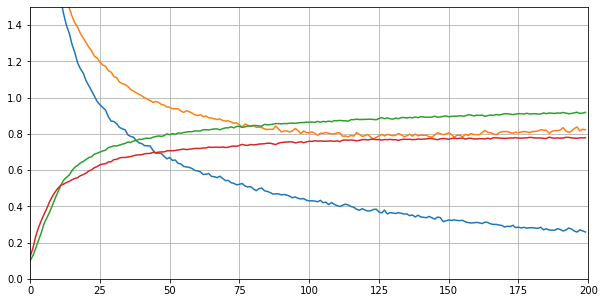

In [52]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,200,0,1.5])

Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))